# Game Review  Data Analysis

Mahesh Jadhav

In [1]:

import pandas as pd

author_import = pd.read_csv("data/author_info.csv")
game_import = pd.read_csv("data/game_info.csv")
purchase_import = pd.read_csv("data/purchase_info.csv")
review_import = pd.read_csv("data/review_info.csv")

In [2]:


df_1 = _deepnote_execute_sql("""select  
 review_id,
 language,
 review,
 timestamp_created,
 timestamp_updated,
 recommended,
 votes_helpful,
 votes_funny,
 weighted_vote_score,
 comment_count,
 steam_purchase,
 received_for_free,
 written_during_early_access,
 app_name,
 cast("author.steamid" as varchar(20)) as steamid,
 "author.num_games_owned" as num_games_owned,
 "author.num_reviews" as num_reviews,
 "author.playtime_forever" as playtime_forever,
 "author.playtime_last_two_weeks" as playtime_last_two_weeks,
 "author.playtime_at_review" as playtime_at_review,
 "author.last_played" as last_played 
 from review_import 
 join
 purchase_import using(review_id)
join
 game_import  using(review_id)
join
 author_import using(review_id)



""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,...,received_for_free,written_during_early_access,app_name,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
0,68675252,russian,"Божечки, это же 10/10",1588772815,1588772815,True,0,0,0.000000,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198199699706,56,3,5552.0,0.0,5517.0,1.588775e+09
1,68675154,english,"What can I say, the best game ever?\nThe BEST ...",1588772690,1588772690,True,0,0,0.000000,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198320854803,112,8,33707.0,0.0,27915.0,1.593310e+09
2,68674806,english,good,1588772228,1591709306,True,1,0,0.523810,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198282201987,17,9,3166.0,0.0,2633.0,1.603555e+09
3,68673945,russian,WDPSLDFLZLD\n,1588771138,1588771138,True,0,0,0.000000,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561199016358734,3,2,6579.0,0.0,3569.0,1.608999e+09
4,68670882,russian,"Спешл эдишн дали халявно, т.к. ранее покупал о...",1588767094,1588767094,True,0,0,0.000000,0,...,True,False,The Elder Scrolls V: Skyrim Special Edition,76561198236134140,39,5,10588.0,0.0,10441.0,1.593180e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,47310228,english,Its rly not that bad.,1544024434,1544024434,True,0,1,0.478261,0,...,False,False,Just Cause 4,76561198102901681,434,11,1173.0,0.0,748.0,1.544727e+09
999996,47310217,french,Aucune option pour changer le FOV (qui doit êt...,1544024395,1544024395,False,20,4,0.521904,0,...,False,False,Just Cause 4,76561198062222284,408,13,13.0,0.0,13.0,1.543945e+09
999997,47310195,russian,В игре многое поправили. Исправили кучу всего ...,1544024314,1552200696,True,0,0,0.514576,0,...,False,False,Just Cause 4,76561198053327292,258,30,755.0,0.0,298.0,1.593884e+09
999998,47310155,english,i love it ahhhhhhhhhhhhhhhhhh,1544024176,1544024176,True,0,1,0.478723,0,...,False,False,Just Cause 4,76561198049307281,20,8,3412.0,0.0,1463.0,1.602000e+09


In [3]:


df_1.dtypes

review_id                        int64
language                        object
review                          object
timestamp_created                int64
timestamp_updated                int64
recommended                       bool
votes_helpful                    int64
votes_funny                      int64
weighted_vote_score            float64
comment_count                    int64
steam_purchase                    bool
received_for_free                 bool
written_during_early_access       bool
app_name                        object
steamid                         object
num_games_owned                  int64
num_reviews                      int64
playtime_forever               float64
playtime_last_two_weeks        float64
playtime_at_review             float64
last_played                    float64
dtype: object

In [4]:


df_1.groupby('steamid')['votes_helpful'].sum().reset_index().sort_values('votes_helpful',ascending= False)


,steamid,votes_helpful
675371,76561198301678331,26149
280175,76561198068792591,15526
396630,76561198107977827,14349
252475,76561198060932732,10610
563810,76561198193312194,10495
...,...,...
393872,76561198106854665,0
393873,76561198106856153,0
393875,76561198106856636,0
393876,76561198106856949,0


In [5]:

top_voted_reviews=df_1.groupby('steamid')['votes_helpful'].sum().reset_index().sort_values('votes_helpful',ascending= False)
top_voted_reviews

,steamid,votes_helpful
675371,76561198301678331,26149
280175,76561198068792591,15526
396630,76561198107977827,14349
252475,76561198060932732,10610
563810,76561198193312194,10495
...,...,...
393872,76561198106854665,0
393873,76561198106856153,0
393875,76561198106856636,0
393876,76561198106856949,0


In [6]:
Most_reviews=df_1.groupby('steamid')['review_id'].count().reset_index().sort_values('review_id',ascending= False)
Most_reviews

,steamid,review_id
691805,76561198315585536,22
605538,76561198239163744,20
258582,76561198062813911,19
200553,76561198045381877,17
277670,76561198068116100,17
...,...,...
319902,76561198080424312,1
319903,76561198080424324,1
319904,76561198080424388,1
319905,76561198080424757,1


In [7]:

ohw=pd.merge(left=top_voted_reviews,right=Most_reviews,on='steamid',how='inner')
ohw


,steamid,votes_helpful,review_id
0,76561198301678331,26149,1
1,76561198068792591,15526,1
2,76561198107977827,14349,1
3,76561198060932732,10610,2
4,76561198193312194,10495,1
...,...,...,...
912548,76561198106854665,0,2
912549,76561198106856153,0,1
912550,76561198106856636,0,1
912551,76561198106856949,0,1


In [8]:
import plotly.express as px
px.histogram(ohw,x='review_id',template="presentation", title="Reviews per Reviewer")





In [9]:
review_count=ohw.groupby('review_id')['steamid'].count().reset_index()
review_count['cumperc']=review_count['steamid'].cumsum()/review_count['steamid'].sum()*100
review_count

,review_id,steamid,cumperc
0,1,843838,92.470026
1,2,56007,98.607423
2,3,9085,99.602982
3,4,2340,99.859405
4,5,751,99.941702
5,6,280,99.972385
6,7,112,99.984658
7,8,53,99.990466
8,9,43,99.995178
9,10,26,99.998028


# Analysis of Top Reviewers

Over 92% of reviewers have only reviewed a single game, we probably won't be giving gift cards to people who have only written one review even if it was a stellar one, let's limit data to people who have written more reviews

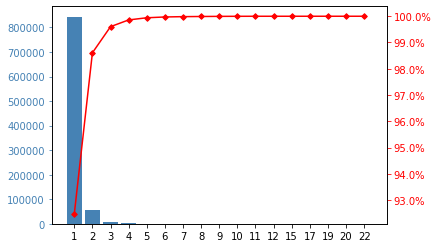

In [10]:
# https://www.statology.org/pareto-chart-python/

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(review_count.index, review_count['steamid'], color=color1)
ax.set_xticks(review_count.index, review_count["review_id"].values)
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(review_count.index, review_count['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

#display Pareto chart
plt.show()



Over 92% reviewers have reviewed only single game, we Probably won't be giving gift cards
to people who have only written one review even if it was stellar one, let's limit data to 
people who have written more reviews.

Change the below slider to look at diffrent cohornts.

In [11]:
Games_reviewd = 3

In [12]:
Votes_helpful = 400

In [13]:

Top_reviewers=ohw[(ohw["votes_helpful"]>=Votes_helpful) & (ohw["review_id"]>=Games_reviewd)].steamid.values
Top_reviewers_dataframe=df_1[df_1["steamid"].isin(Top_reviewers)]
Top_reviewers_dataframe


,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,...,received_for_free,written_during_early_access,app_name,steamid,num_games_owned,num_reviews,playtime_forever,playtime_last_two_weeks,playtime_at_review,last_played
34734,54836996,russian,Оригинальная игра и DLC к ней: \nhttps://store...,1566902925,1566902925,False,633,23,0.896432,33,...,True,False,The Elder Scrolls V: Skyrim Special Edition,76561198061514868,1513,231,4193.0,0.0,4193.0,1.547179e+09
42459,51112620,schinese,1000小时后过来发评测。\n游戏本体内容和MOD扩展性相关的东西我就不说了，大家看其他人的...,1559978589,1559978589,True,258,19,0.932274,12,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198043336844,211,49,93971.0,0.0,60771.0,1.581237e+09
44193,49704965,english,The Canadian winter of 2011: I remember it wel...,1553305262,1553305354,True,655,227,0.942581,41,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198010371788,570,153,1994.0,0.0,586.0,1.588529e+09
44364,49467832,english,"a sound track of glory, an adventure of hardsh...",1552169306,1552169306,True,0,0,0.000000,0,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198199811506,146,41,2789.0,0.0,604.0,1.595256e+09
45343,48643868,english,Buy it for skyrim together,1548846113,1548846113,True,810,107,0.951849,27,...,False,False,The Elder Scrolls V: Skyrim Special Edition,76561198097450702,323,135,786.0,0.0,481.0,1.575289e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983060,47485053,english,[b]The [i]Kingdom[/i] series has always had a ...,1544629977,1544630167,True,44,2,0.795707,16,...,False,False,Kingdom Two Crowns,76561198040884867,1858,903,446.0,0.0,325.0,1.545181e+09
993225,56763901,russian,"Все твои злейшие враги в этой игре - женщины, ...",1573225007,1573225074,True,7,5,0.509776,0,...,False,False,Just Cause 4,76561198061514868,1513,231,399.0,0.0,96.0,1.573479e+09
993361,56720280,english,­,1573162869,1573162869,True,46,7,0.405999,0,...,False,False,Just Cause 4,76561198315585536,1350,1105,43.0,0.0,6.0,1.573267e+09
993396,56654620,english,I'm really torn on writing this review. Just C...,1573075860,1573673723,True,461,18,0.947325,41,...,False,False,Just Cause 4,76561198027141250,1428,135,3767.0,0.0,827.0,1.577301e+09


In [14]:


print("Cohort size: ", len(Top_reviewers))

Cohort size:  91


In [15]:
# Reviewer Analysis
    # Number of Games
    # Playtime per game Reviewed

# Review Analysis
    # Character length of average review
    # Average comments

In [16]:

num_games_owned=Top_reviewers_dataframe.groupby("steamid")["num_games_owned"].max().reset_index()
px.histogram(num_games_owned,x="num_games_owned",nbins=50,template='simple_white', title="Number of games owened by Top Reviewers")

In [17]:

playtime_per_game=Top_reviewers_dataframe.groupby("steamid")['num_games_owned','playtime_forever'].max().reset_index()
playtime_per_game["playtime_per_game"]=playtime_per_game["playtime_forever"]/playtime_per_game["num_games_owned"]
px.histogram(playtime_per_game,x="playtime_forever",template="simple_white",title="play time per game by Top Reviewer")

<ipython-input-17-bf956c23c79f>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [18]:

Top_reviewers_dataframe['review_len']=Top_reviewers_dataframe['review'].str.len()
px.histogram(Top_reviewers_dataframe,x="review_len",template="simple_white",title="Lenght of review of Top Reviewers")


<ipython-input-18-a757410eccb0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:


px.histogram(Top_reviewers_dataframe,x="comment_count",template="simple_white", title="Number Of Comments, Top Reviewers")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9d959d14-57ba-44d6-b730-fd0e4c83db77' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>